In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the data
df_credit = pd.read_csv("german_credit_data.csv",index_col=0)

In [6]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [7]:
print(df_credit.nunique())
print(df_credit.head())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


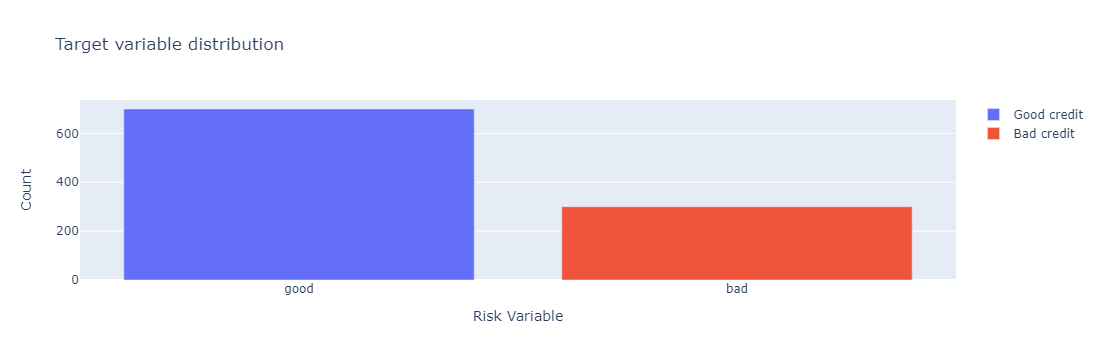

In [10]:
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
from collections import Counter

trace0 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

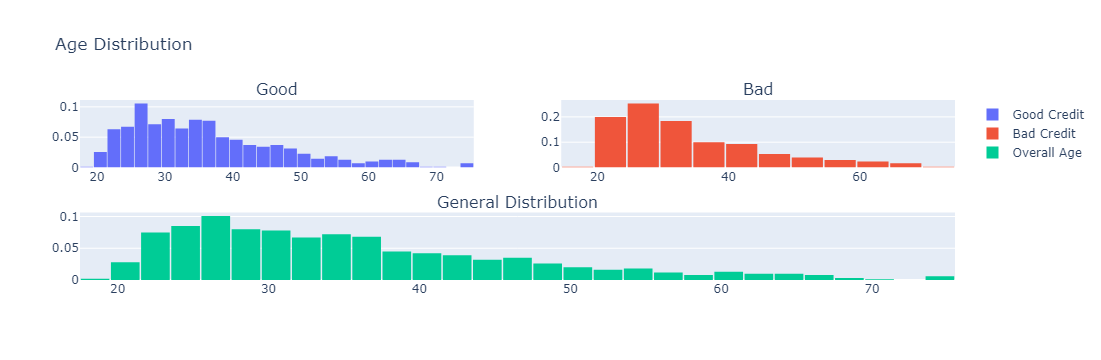

In [13]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

# First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
# Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
# Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

# Creating the grid
fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                    subplot_titles=('Good', 'Bad', 'General Distribution'))

# Adding the traces
fig.add_trace(trace0, row=1, col=1)
fig.add_trace(trace1, row=1, col=2)
fig.add_trace(trace2, row=2, col=1)

# Updating layout
fig.update_layout(showlegend=True, title='Age Distribution', bargap=0.05)

# Plotting the figure
fig.show()


In [14]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

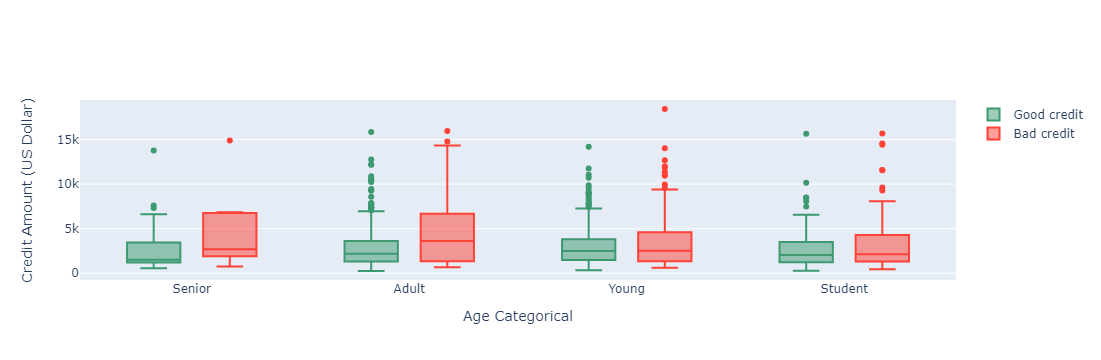

In [15]:
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

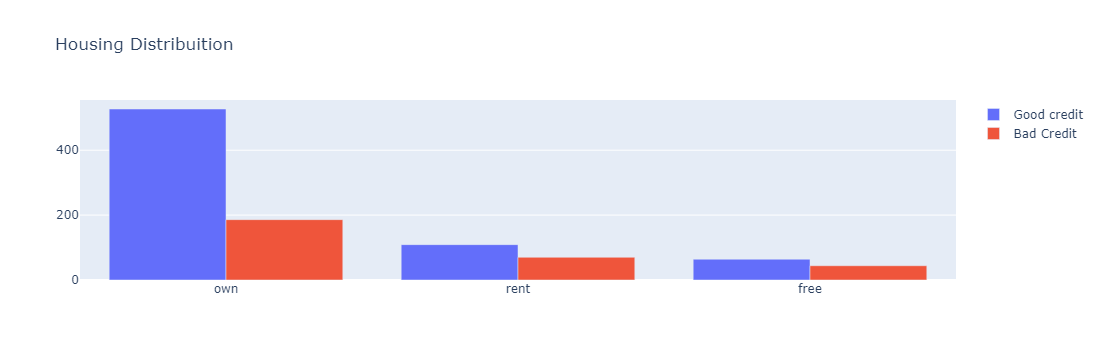

In [19]:
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

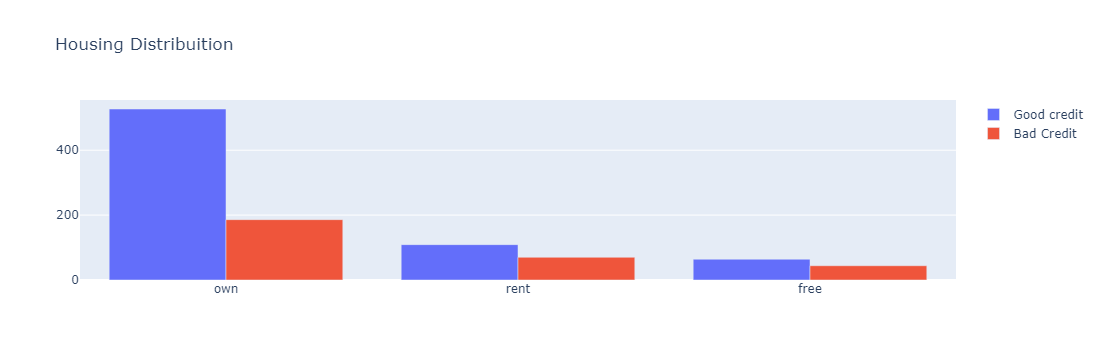

In [20]:
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)


trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

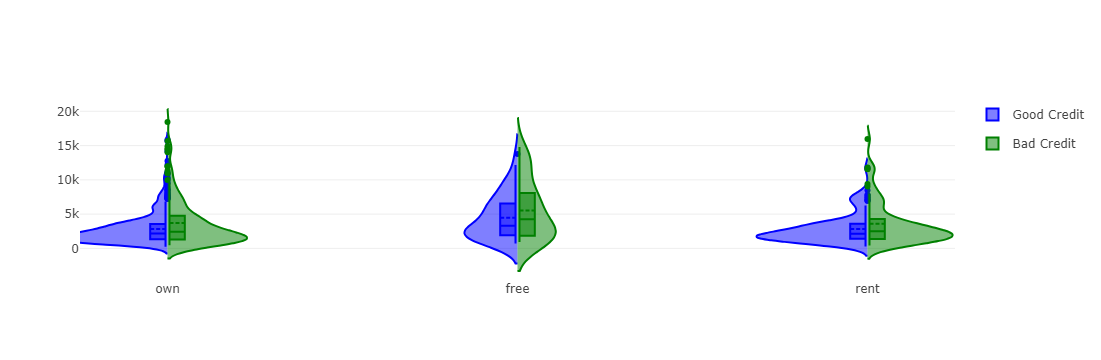

In [21]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Housing'],
            "y": df_good['Credit amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Housing'],
            "y": df_bad['Credit amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

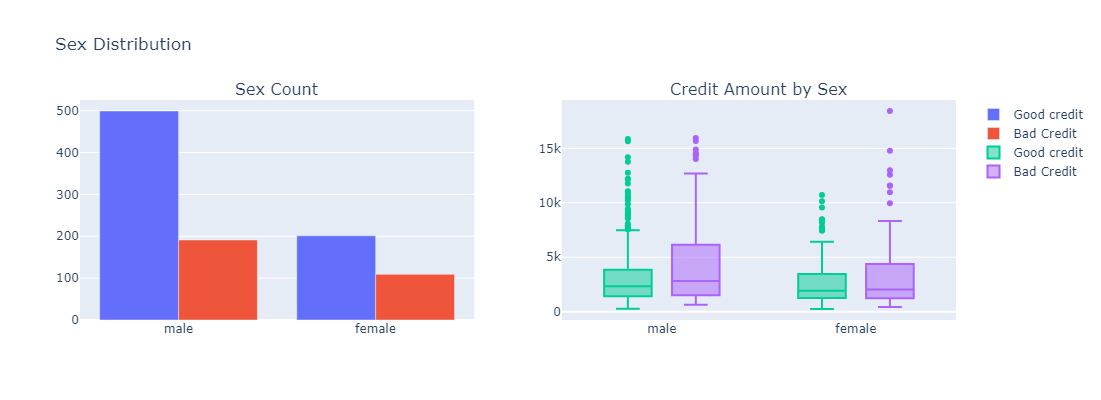

In [24]:
trace0 = go.Bar(
    x=df_credit[df_credit["Risk"] == 'good']["Sex"].value_counts().index.values,
    y=df_credit[df_credit["Risk"] == 'good']["Sex"].value_counts().values,
    name='Good credit'
)

trace1 = go.Bar(
    x=df_credit[df_credit["Risk"] == 'bad']["Sex"].value_counts().index.values,
    y=df_credit[df_credit["Risk"] == 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

trace2 = go.Box(
    x=df_credit[df_credit["Risk"] == 'good']["Sex"],
    y=df_credit[df_credit["Risk"] == 'good']["Credit amount"],
    name=trace0.name
)

trace3 = go.Box(
    x=df_credit[df_credit["Risk"] == 'bad']["Sex"],
    y=df_credit[df_credit["Risk"] == 'bad']["Credit amount"],
    name=trace1.name
)

fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.add_trace(trace0, row=1, col=1)
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.add_trace(trace3, row=1, col=2)

fig.update_layout(height=400, width=800, title='Sex Distribution', boxmode='group')

fig.show()

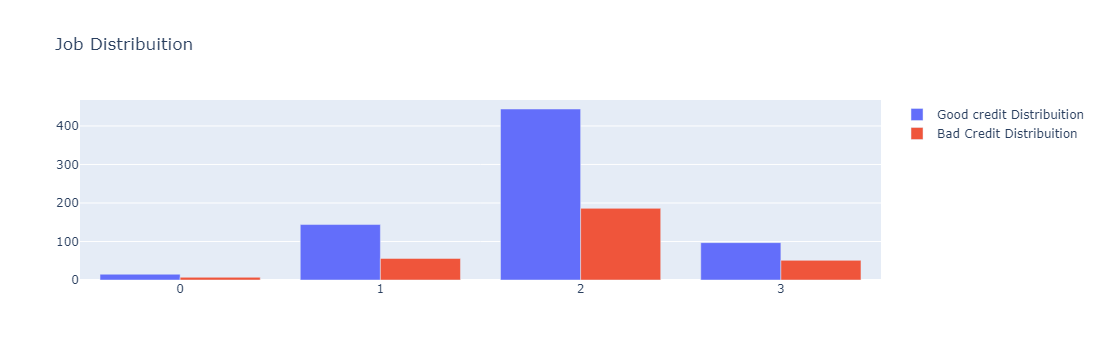

In [26]:
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().values,
    name='Good credit Distribuition'
)

trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Job Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

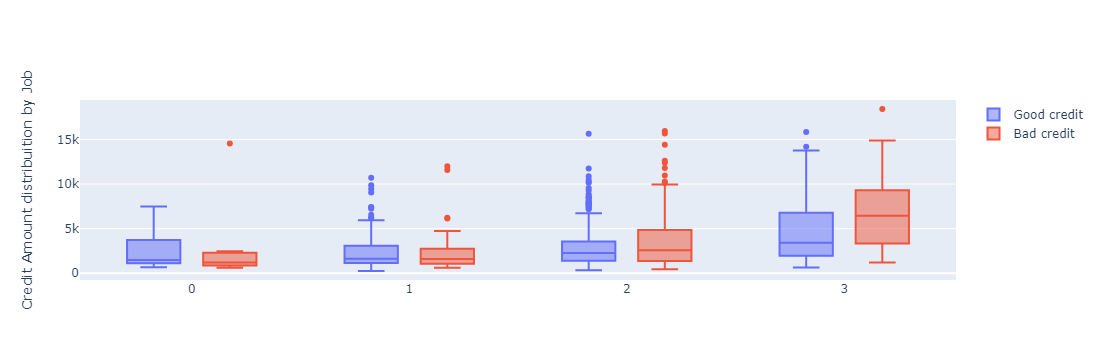

In [27]:
trace0 = go.Box(
    x=df_good["Job"],
    y=df_good["Credit amount"],
    name='Good credit'
)

trace1 = go.Box(
    x=df_bad['Job'],
    y=df_bad['Credit amount'],
    name='Bad credit'
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount distribuition by Job'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

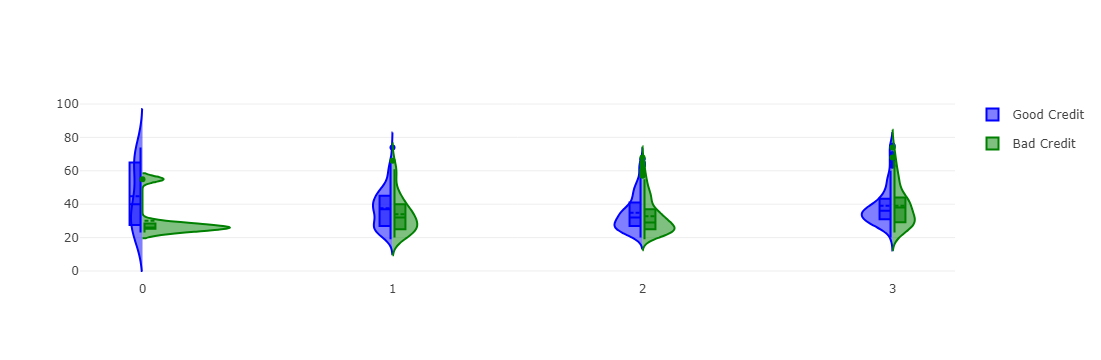

In [28]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Job'],
            "y": df_good['Age'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Job'],
            "y": df_bad['Age'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'Age-Housing', validate = False)

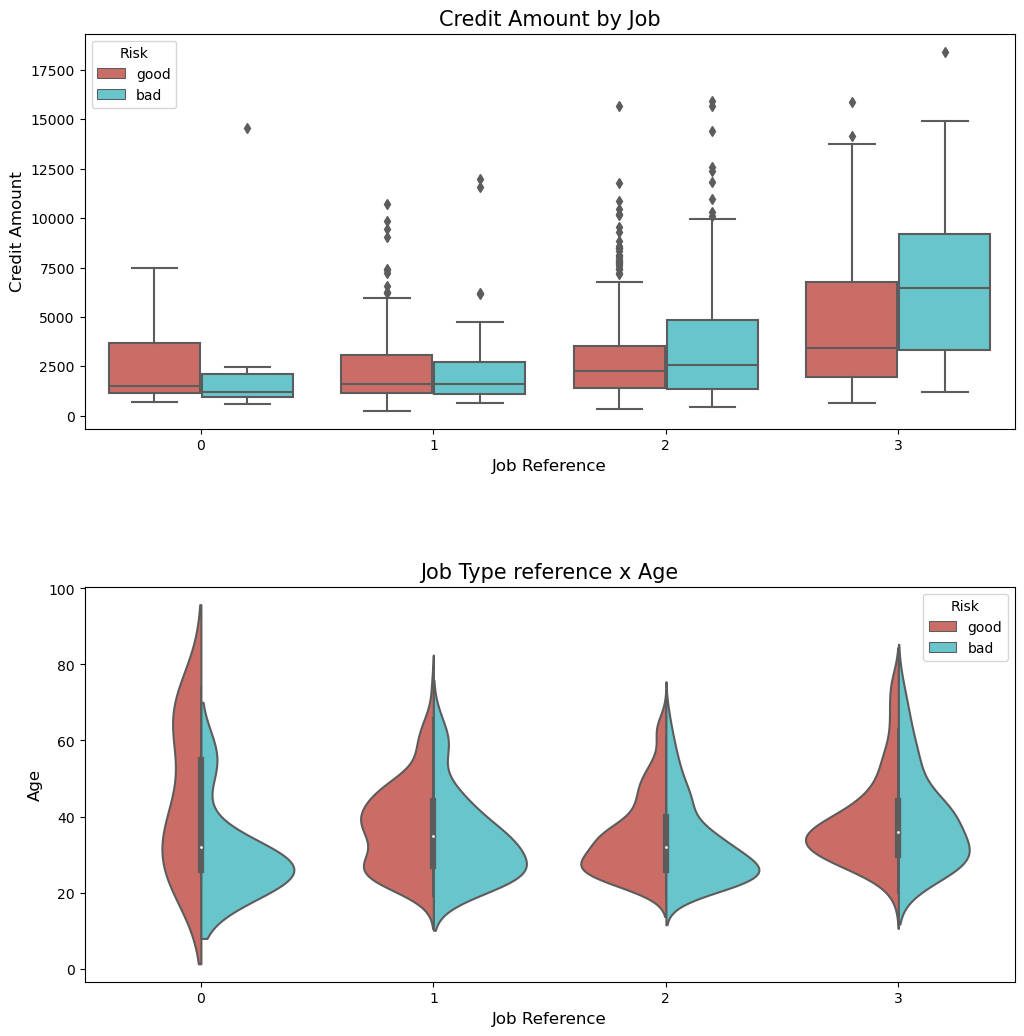

In [29]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="Job", y="Credit amount", data=df_credit, 
            palette="hls", ax=ax[0], hue="Risk")
g1.set_title("Credit Amount by Job", fontsize=15)
g1.set_xlabel("Job Reference", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)

g2 = sns.violinplot(x="Job", y="Age", data=df_credit, ax=ax[1],  
               hue="Risk", split=True, palette="hls")
g2.set_title("Job Type reference x Age", fontsize=15)
g2.set_xlabel("Job Reference", fontsize=12)
g2.set_ylabel("Age", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

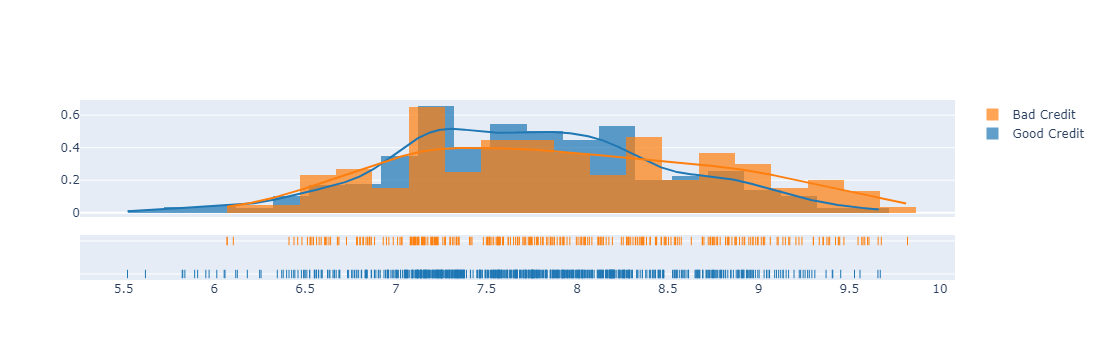

In [30]:
import plotly.figure_factory as ff

x1 = np.log(df_good['Credit amount']) 
x2 = np.log(df_bad["Credit amount"])

hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

py.iplot(fig, filename='Distplot with Multiple Datasets')

C:\Users\Arsh Chadha\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Arsh Chadha\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



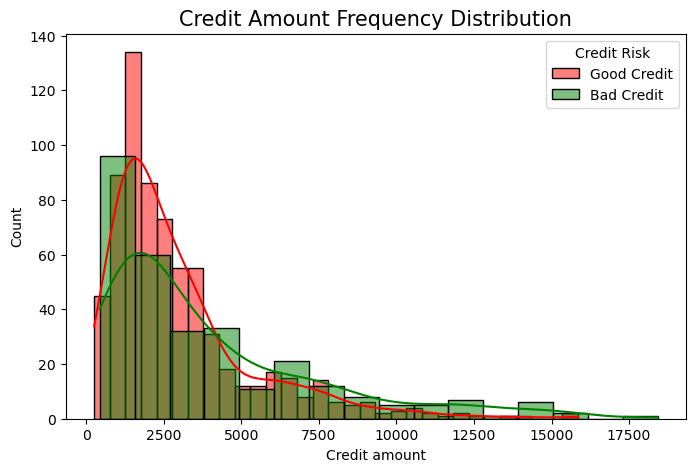

In [32]:
plt.figure(figsize=(8, 5))

g = sns.histplot(df_good['Credit amount'], color='r', kde=True, label='Good Credit')
g = sns.histplot(df_bad["Credit amount"], color='g', kde=True, label='Bad Credit')

g.set_title("Credit Amount Frequency Distribution", fontsize=15)
g.legend(title='Credit Risk')

plt.show()

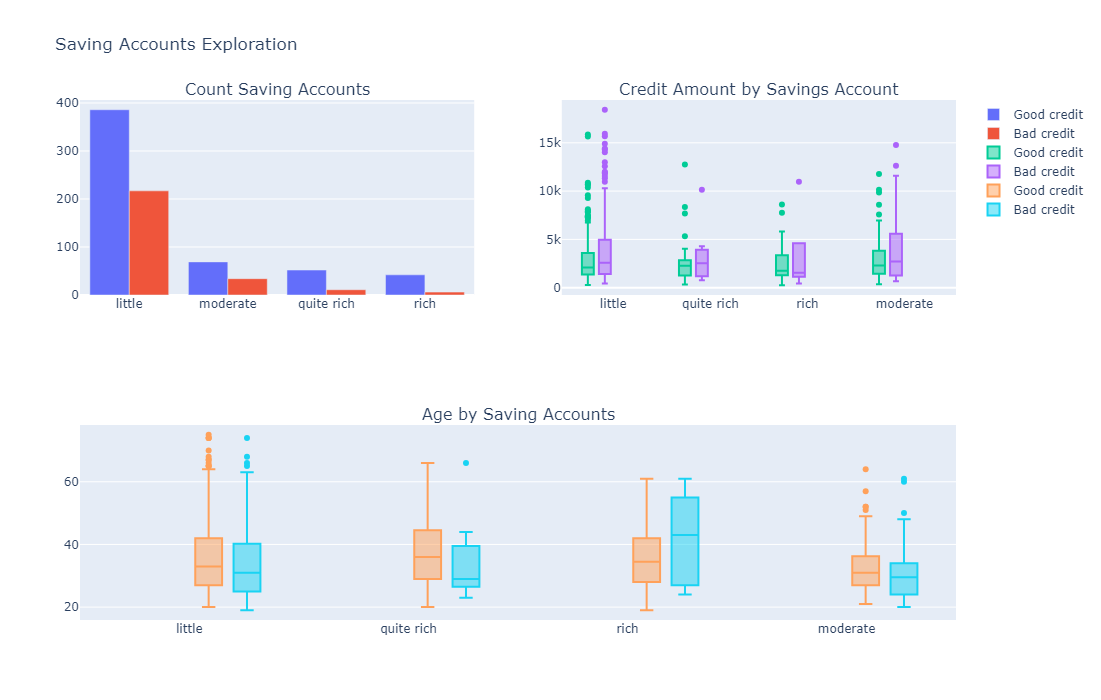

In [34]:
count_good = go.Bar(
    x=df_good["Saving accounts"].value_counts().index.values,
    y=df_good["Saving accounts"].value_counts().values,
    name='Good credit'
)
count_bad = go.Bar(
    x=df_bad["Saving accounts"].value_counts().index.values,
    y=df_bad["Saving accounts"].value_counts().values,
    name='Bad credit'
)

box_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Credit amount"],
    name='Good credit'
)
box_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Credit amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Age"],
    name='Bad credit'
)

fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                    subplot_titles=('Count Saving Accounts', 'Credit Amount by Savings Account', 
                                    'Age by Saving Accounts'))

fig.add_trace(count_good, row=1, col=1)
fig.add_trace(count_bad, row=1, col=1)
fig.add_trace(box_1, row=1, col=2)
fig.add_trace(box_2, row=1, col=2)
fig.add_trace(scat_1, row=2, col=1)
fig.add_trace(scat_2, row=2, col=1)

fig.update_layout(height=700, width=800, title='Saving Accounts Exploration', boxmode='group')

fig.show()

Description of Distribuition Saving accounts by Risk:  
Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


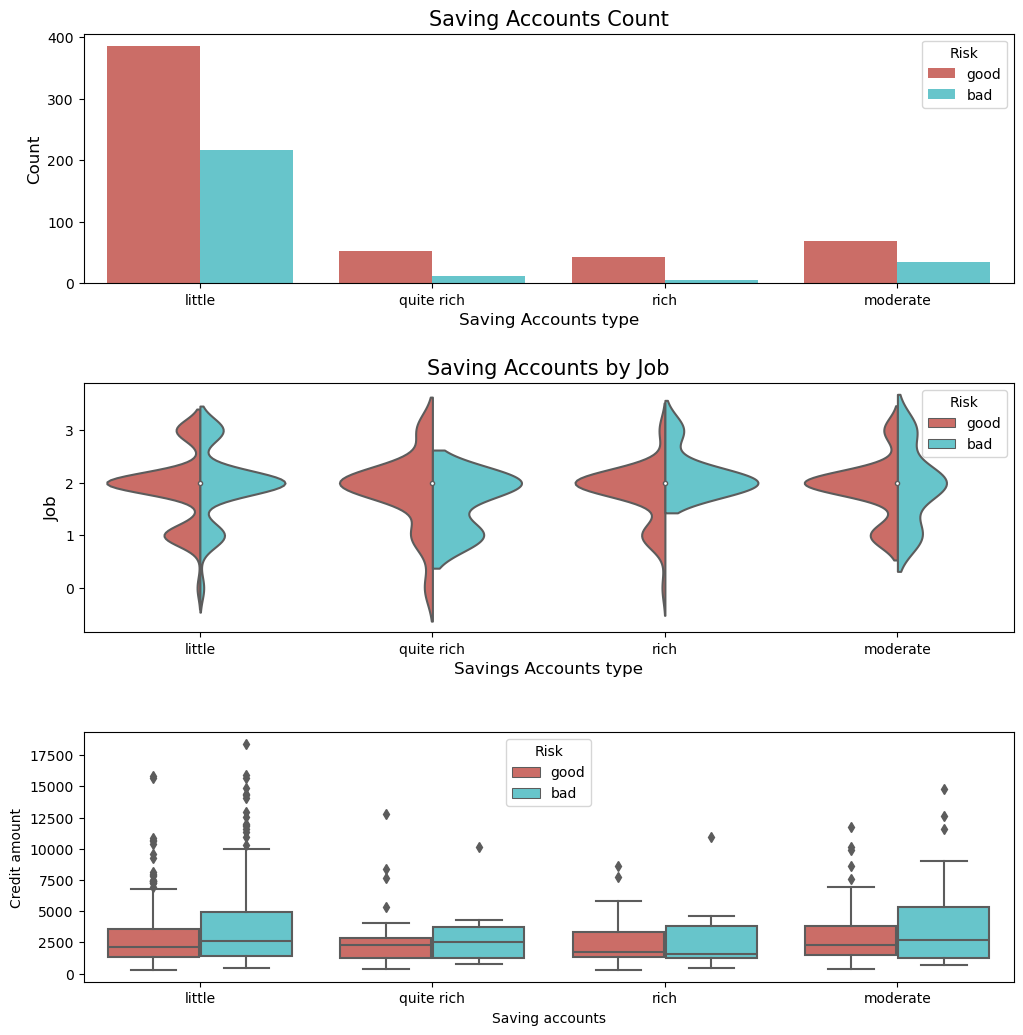

Description of Distribuition Saving accounts by Risk:  
Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


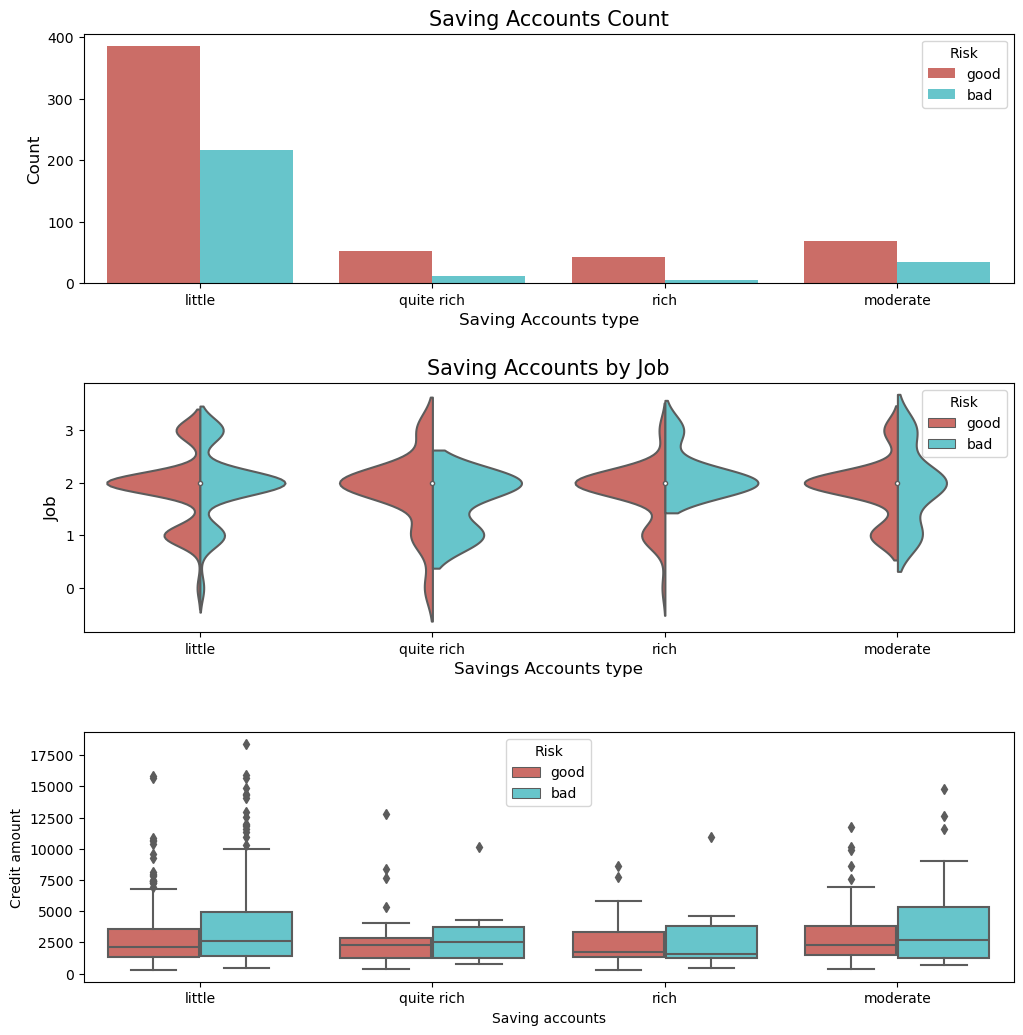

In [36]:
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(df_credit["Saving accounts"],df_credit.Risk))

fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Saving accounts", data=df_credit, palette="hls", 
              ax=ax[0],hue="Risk")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="Saving accounts", y="Job", data=df_credit, palette="hls", 
               hue = "Risk", ax=ax[1],split=True)
g1.set_title("Saving Accounts by Job", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g = sns.boxplot(x="Saving accounts", y="Credit amount", data=df_credit, ax=ax[2],
            hue = "Risk",palette="hls")
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(df_credit["Saving accounts"],df_credit.Risk))

fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Saving accounts", data=df_credit, palette="hls", 
              ax=ax[0],hue="Risk")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="Saving accounts", y="Job", data=df_credit, palette="hls", 
               hue = "Risk", ax=ax[1],split=True)
g1.set_title("Saving Accounts by Job", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g = sns.boxplot(x="Saving accounts", y="Credit amount", data=df_credit, ax=ax[2],
            hue = "Risk",palette="hls")
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

Values describe: 
Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


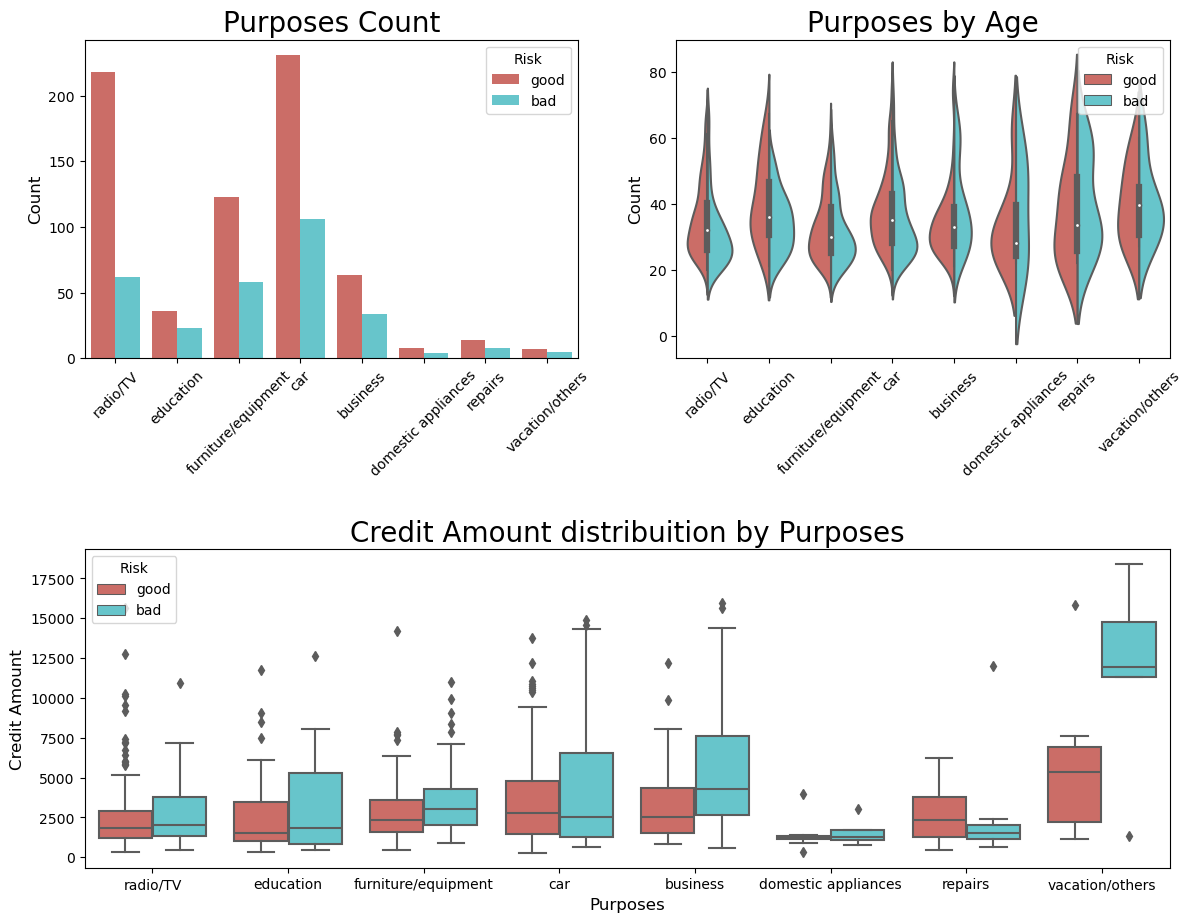

In [37]:
print("Values describe: ")
print(pd.crosstab(df_credit.Purpose, df_credit.Risk))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df_credit, 
              palette="hls", hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Age", data=df_credit, 
                    palette="hls", hue = "Risk",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Credit amount", data=df_credit, 
               palette="hls", hue = "Risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

C:\Users\Arsh Chadha\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Arsh Chadha\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



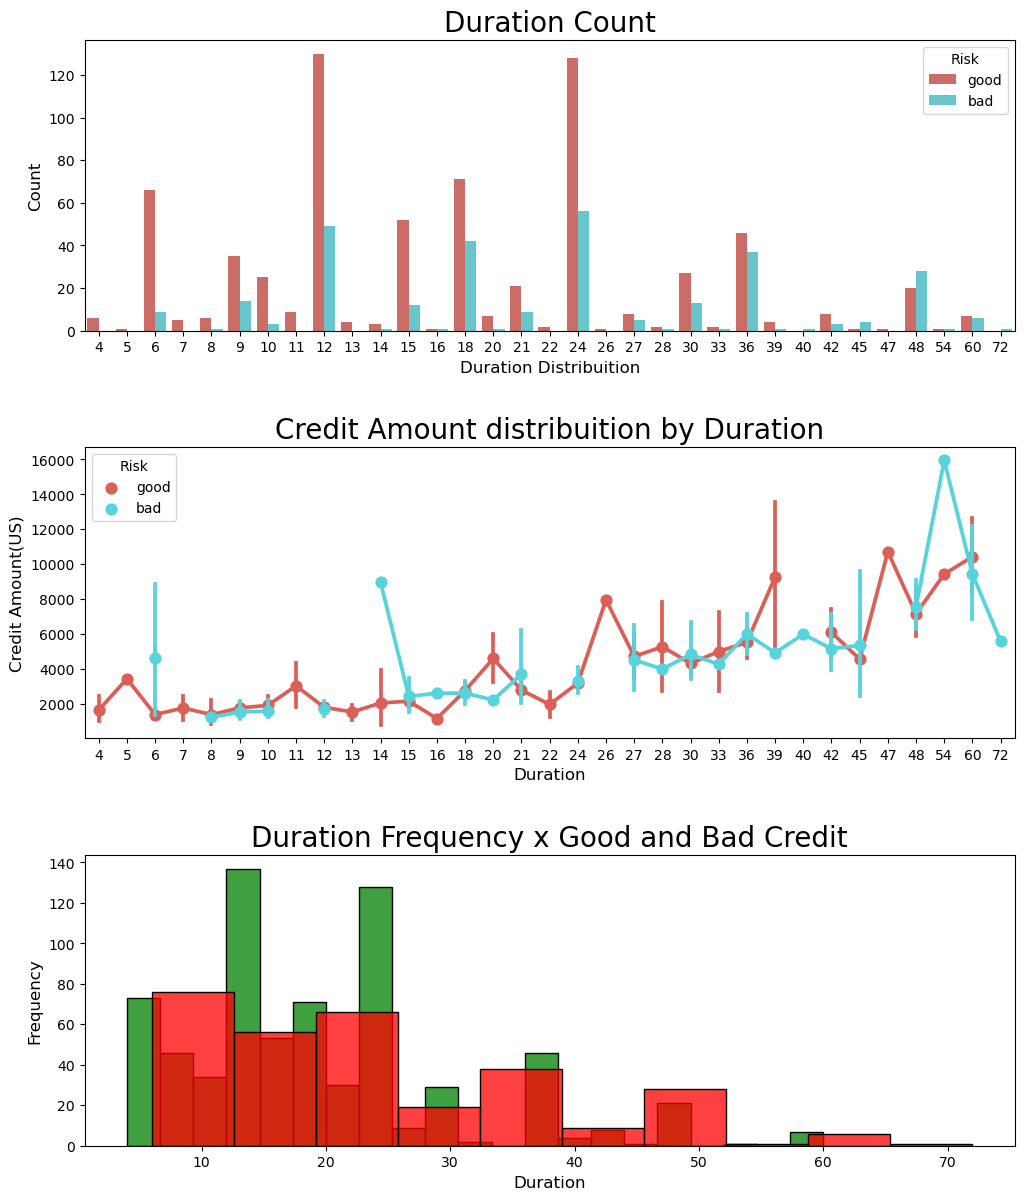

In [40]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Duration", data=df_credit, 
              palette="hls",  hue = "Risk")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit amount",data=df_credit,
                   hue="Risk", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.histplot(df_good["Duration"], color='g')
g2 = sns.histplot(df_bad["Duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x Good and Bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

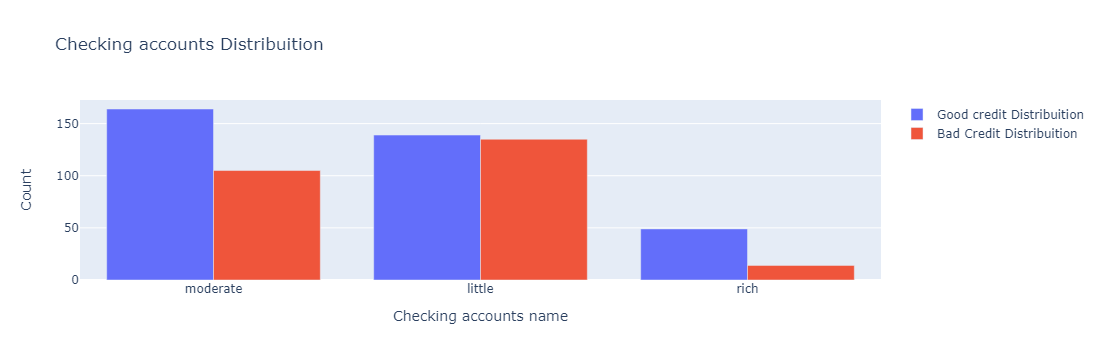

In [41]:
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Checking account"].value_counts().values,
    name='Good credit Distribuition' 
    
)

trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Checking account"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Checking accounts Distribuition',
    xaxis=dict(title='Checking accounts name'),
    yaxis=dict(title='Count'),
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Age-ba', validate = False)

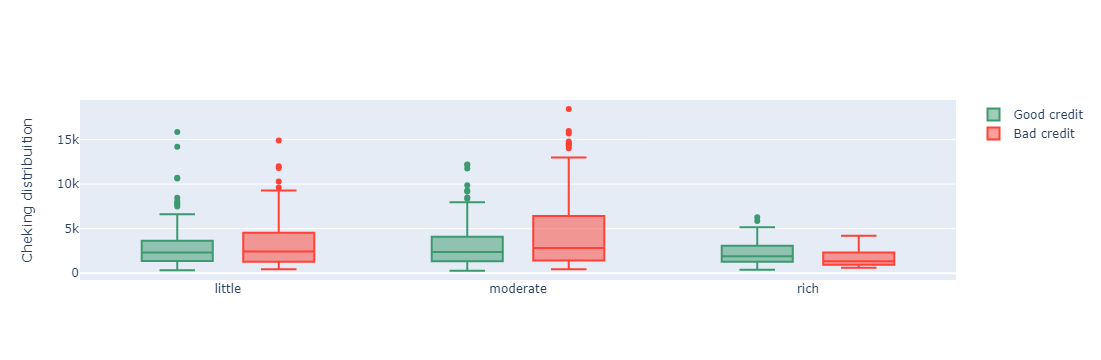

In [42]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Checking account"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Checking account'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Cheking distribuition'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

Total values of the most missing variable: 
Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


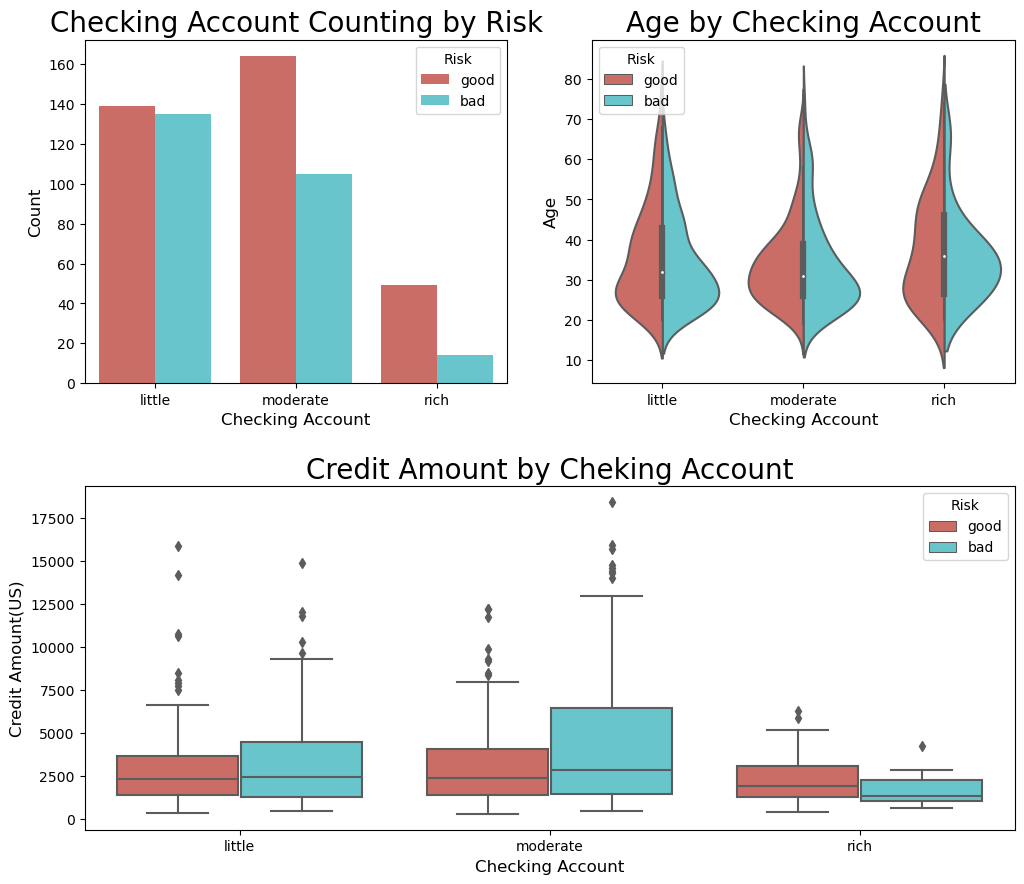

In [43]:
print("Total values of the most missing variable: ")
print(df_credit.groupby("Checking account")["Checking account"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Checking account", data=df_credit, 
              palette="hls", hue="Risk")
g.set_xlabel("Checking Account", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Checking Account Counting by Risk", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="Checking account", y="Age", data=df_credit, palette="hls", hue = "Risk",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by Checking Account", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="Checking account",y="Credit amount", data=df_credit,hue='Risk',palette="hls")
g2.set_xlabel("Checking Account", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)
g2.set_title("Credit Amount by Cheking Account", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

plt.show()
plt.show()

In [44]:
print(pd.crosstab(df_credit.Sex, df_credit.Job))

Job      0    1    2    3
Sex                      
female  12   64  197   37
male    10  136  433  111


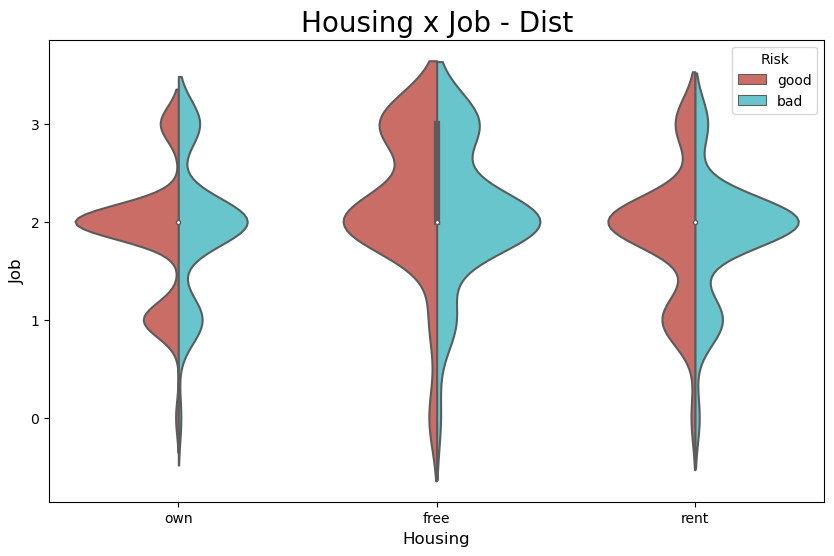

In [45]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",y="Job",data=df_credit,
                   hue="Risk", palette="hls",split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=20)

plt.show()

In [46]:
print(pd.crosstab(df_credit["Checking account"],df_credit.Sex))

Sex               female  male
Checking account              
little                88   186
moderate              86   183
rich                  20    43


In [47]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [48]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [49]:
print("Purpose : ",df_credit.Purpose.unique())
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Aget_cat : ",df_credit['Age_cat'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']
Aget_cat :  ['Senior', 'Student', 'Adult', 'Young']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


In [50]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [51]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [52]:
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

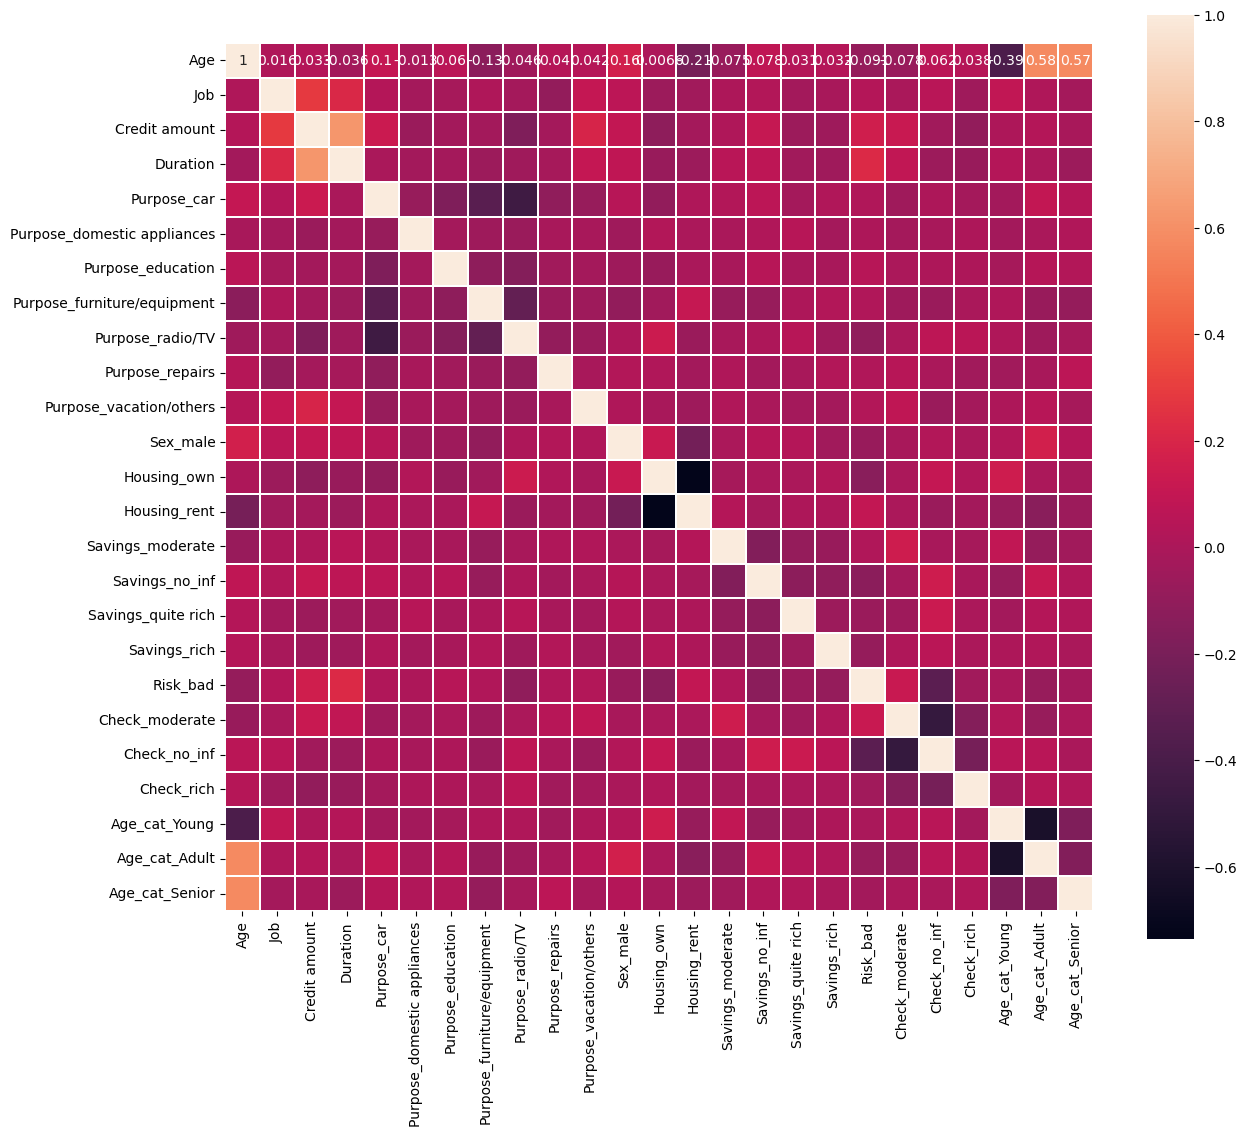

In [53]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [55]:
df_credit

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Savings_no_inf,Savings_quite rich,Savings_rich,Risk_bad,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,67,2,1169,6,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
1,22,2,5951,48,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
2,49,1,2096,12,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,45,2,7882,42,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,53,2,4870,24,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
996,40,3,3857,30,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
997,38,2,804,12,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
998,23,2,1845,45,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [57]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score 
from sklearn.ensemble import RandomForestClassifier

In [58]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

In [67]:
X = df_credit.drop('Risk_bad', axis=1).values
y = df_credit["Risk_bad"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
df_credit.drop('Risk_bad',axis=1)

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Savings_moderate,Savings_no_inf,Savings_quite rich,Savings_rich,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,67,2,7.063904,6,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
1,22,2,8.691315,48,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,49,1,7.647786,12,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,45,2,8.972337,42,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,53,2,8.490849,24,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,7.459339,12,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
996,40,3,8.257645,30,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
997,38,2,6.689599,12,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
998,23,2,7.520235,45,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=4)

rf.fit(X_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=15, random_state=4)

In [70]:
y_pred = rf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.745


[[125  16]
 [ 35  24]]


0.43478260869565216
